In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [26]:
df= pd.read_csv("train_data.csv")

In [27]:
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


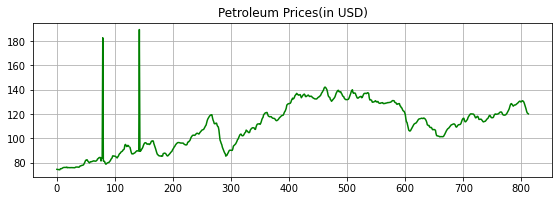

In [28]:
### plotting our data with respect to the depth
fig=plt.subplots(figsize=(500,100))
ax1=plt.subplot2grid((100,45), (0,0), rowspan=3,colspan=1)
ax1.plot('Petrol (USD)', data=df, color='green')
ax1.set_title('Petroleum Prices(in USD)')
ax1.grid()

In [29]:
df.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [30]:
petrolpricesmean= df['Petrol (USD)'].mean() 
df['Petrol (USD)']= df['Petrol (USD)'].fillna(petrolpricesmean)

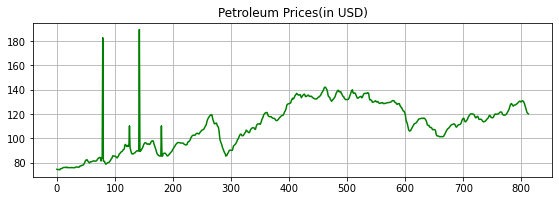

In [31]:
### plotting our data with respect to the depth
fig=plt.subplots(figsize=(500,100))
ax1=plt.subplot2grid((100,45), (0,0), rowspan=3,colspan=1)
ax1.plot('Petrol (USD)', data=df, color='green')
ax1.set_title('Petroleum Prices(in USD)')
ax1.grid()

In [32]:
df.isnull().sum() ## no null values left

Date            0
Petrol (USD)    0
dtype: int64

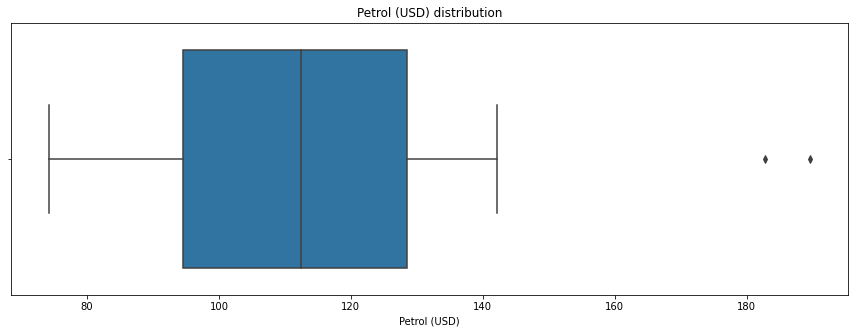

In [33]:
def outlier(data,column):
    plt.figure(figsize=(15,5))
    sns.boxplot(data[column])
    plt.title("{} distribution".format(column))


outlier(df,'Petrol (USD)')

In [34]:
def end_value_show(data,column):
    print("Min value of {} is {} \nMax value of {} is {}".format(column,data[column].min(),column,data[column].max()))
for i in df.columns:
    end_value_show(df,i)

Min value of Date is 1/1/2007 
Max value of Date is 9/9/2013
Min value of Petrol (USD) is 74.21 
Max value of Petrol (USD) is 189.51


In [35]:
df=df[df["Petrol (USD)"]<140]

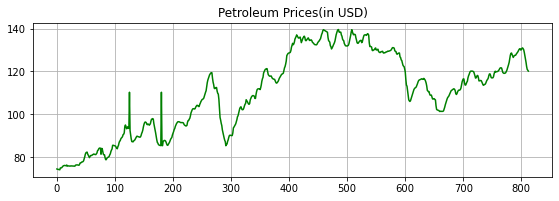

In [36]:
### plotting our data with respect to the depth
fig=plt.subplots(figsize=(500,100))
ax1=plt.subplot2grid((100,45), (0,0), rowspan=3,colspan=1)
ax1.plot('Petrol (USD)', data=df, color='green')
ax1.set_title('Petroleum Prices(in USD)')
ax1.grid()

In [37]:
lst = list(df)
df1 = df.copy(deep=True)
window = 5
df1["Petrol (USD)"] = pd.Series(df1["Petrol (USD)"]).rolling(window=window, min_periods=1).mean()  ## smoothening the data with the help of mean

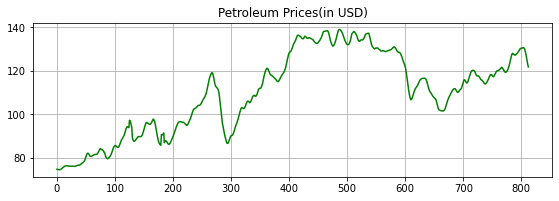

In [38]:
### plotting our data with respect to the depth
fig=plt.subplots(figsize=(500,100))
ax1=plt.subplot2grid((100,45), (0,0), rowspan=3,colspan=1)
ax1.plot('Petrol (USD)', data=df1, color='green')
ax1.set_title('Petroleum Prices(in USD)')
ax1.grid()

# Applying Autoregression techniques

In [39]:
df1.to_csv('data.csv', index=False) 


In [40]:
df2 = pd.read_csv('data.csv', header=0, index_col=0)


In [41]:
df2.head()

,Petrol (USD)
Date,
6/9/2003,74.590000
6/16/2003,74.530000
6/23/2003,74.493333
6/30/2003,74.457500
7/7/2003,74.422000


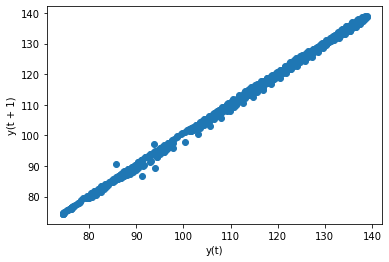

In [42]:
from pandas.plotting import lag_plot
lag_plot(df2)
plt.show()

In [43]:
from pandas import DataFrame
series = pd.read_csv('data.csv', header=0, index_col=0)
values = DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.999324
t+1  0.999324  1.000000


In [44]:
dataframe.head()

,t-1,t+1
0,NaN,74.590000
1,74.590000,74.530000
2,74.530000,74.493333
3,74.493333,74.457500
4,74.457500,74.422000


In [45]:
dataframe = dataframe[1:]
dataframe.tail()

,t-1,t+1
799,128.572,127.304
800,127.304,125.756
801,125.756,124.172
802,124.172,122.814
803,122.814,121.696


In [46]:
from sklearn.metrics import mean_squared_error
dataframe_error = mean_squared_error(dataframe[t+1],dataframe[t+1])


NameError: name 't' is not defined

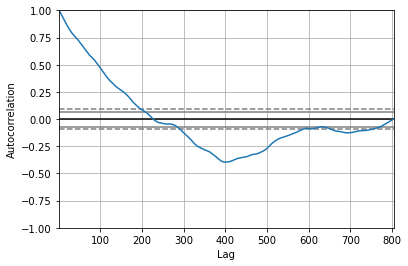

In [47]:
pd.plotting.autocorrelation_plot(series)
plt.show()

In [48]:
series.values

array([[ 74.59      ],
       [ 74.53      ],
       [ 74.49333333],
       [ 74.4575    ],
       [ 74.422     ],
       [ 74.346     ],
       [ 74.466     ],
       [ 74.602     ],
       [ 74.756     ],
       [ 74.988     ],
       [ 75.308     ],
       [ 75.504     ],
       [ 75.71      ],
       [ 75.932     ],
       [ 76.084     ],
       [ 76.152     ],
       [ 76.158     ],
       [ 76.218     ],
       [ 76.152     ],
       [ 76.122     ],
       [ 76.092     ],
       [ 76.076     ],
       [ 75.978     ],
       [ 75.984     ],
       [ 75.978     ],
       [ 75.978     ],
       [ 75.972     ],
       [ 75.976     ],
       [ 75.974     ],
       [ 75.958     ],
       [ 75.934     ],
       [ 75.92      ],
       [ 76.        ],
       [ 76.104     ],
       [ 76.212     ],
       [ 76.336     ],
       [ 76.444     ],
       [ 76.448     ],
       [ 76.424     ],
       [ 76.474     ],
       [ 76.652     ],
       [ 76.852     ],
       [ 77.094     ],
       [ 77

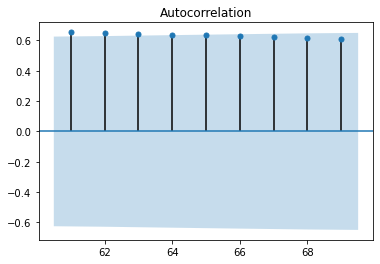

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(series.values, lags =(61,62,63,64,65,66,67,68,69))
plt.show()

### Q =66

<function matplotlib.pyplot.show(*args, **kw)>

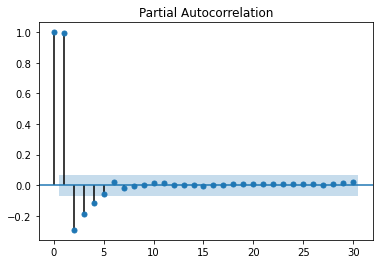

In [50]:
plot_pacf(series)
plt.show

### P = 3

In [51]:
series

,Petrol (USD)
Date,
6/9/2003,74.590000
6/16/2003,74.530000
6/23/2003,74.493333
6/30/2003,74.457500
7/7/2003,74.422000
...,...
12/3/2018,127.304000
12/10/2018,125.756000
12/17/2018,124.172000


Test MSE: 0.541


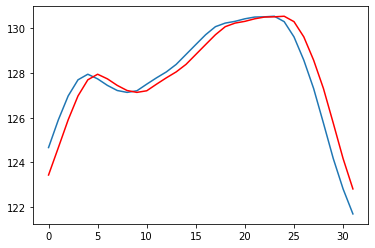

In [52]:
from sklearn.metrics import mean_squared_error
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-32], X[len(X)-32:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

Coefficients: [ 0.14999472  1.69992494 -0.42112957 -0.16395006 -0.15150935 -0.88946585
  1.54947181 -0.3748433  -0.14222214 -0.21485987 -0.72405102  1.38607922
 -0.31339117 -0.11209649 -0.22792662 -0.63210045  1.19019292 -0.2443307
 -0.09488999 -0.23837013 -0.50029675  0.98923937 -0.17363017 -0.06601796
 -0.26276125 -0.38696901  0.83798    -0.13746377 -0.03330235 -0.29158826
 -0.30095559  0.68016859 -0.10335859 -0.00214196 -0.28611236 -0.17823923
  0.52807979 -0.05693828  0.03756382 -0.33595887 -0.06918193  0.33024175
 -0.00538315  0.08515076 -0.36779356  0.08866932  0.1796932  -0.00566125
  0.05734117 -0.32913426  0.1970242 ]
predicted=129.918870, expected=129.614000
predicted=129.448662, expected=128.572000
predicted=128.998088, expected=127.304000
predicted=128.608256, expected=125.756000
predicted=128.376132, expected=124.172000
predicted=128.115246, expected=122.814000
predicted=127.829092, expected=121.696000
Test RMSE: 3.689


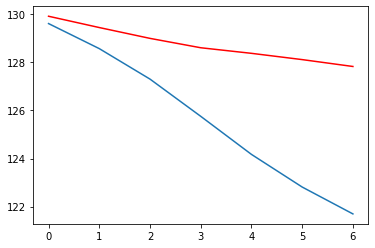

In [53]:
from math import sqrt
from statsmodels.tsa.ar_model import AutoReg
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=50)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
window = 29
model = AutoReg(train, lags=32)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


In [54]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
train = series[0:750]
test  = series[750:804]

In [ ]:
series_model = ARIMA(train, order =(66,2,4))

In [ ]:
#series_model_fit = series_model.fit()

In [ ]:
#series_model_fit.aic

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

making sure the series is stationary

First, I am going to check if the series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Why?

Because, you need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

In [55]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(series.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.934934
p-value: 0.315809


Since P-value is greater than the significance level, let’s difference the series and see how the autocorrelation plot looks like.

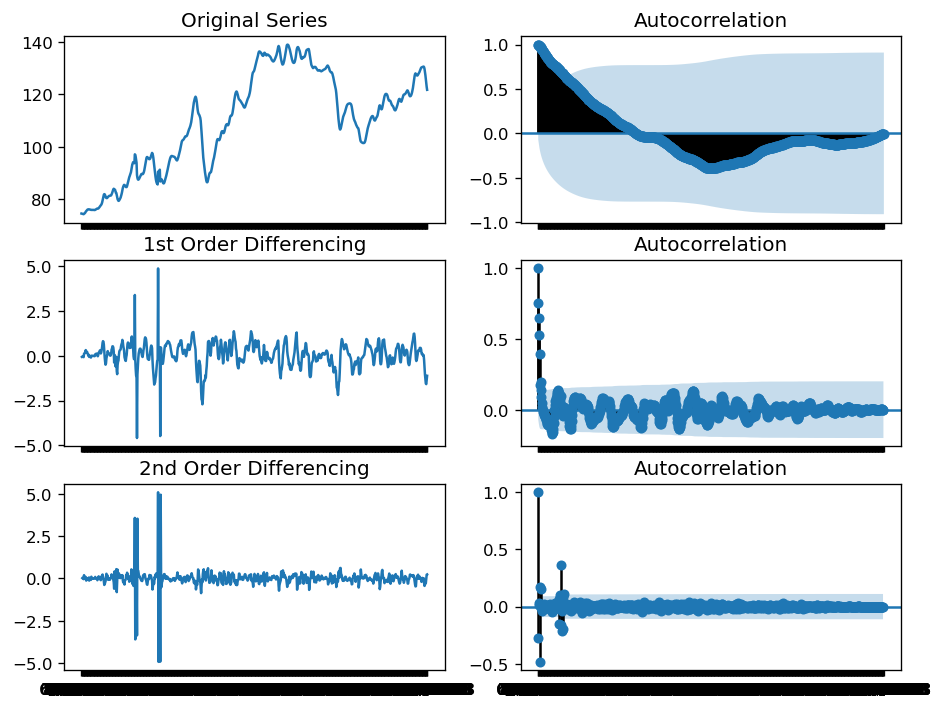

In [56]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('data.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1], lags=df.value.shape[0] - 1)

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1], lags=df.value.shape[0] - 2)

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1], lags=df.value.shape[0] - 3)

plt.show()

In [ ]:
#pip install pmdarima

In [ ]:
'''from pmdarima.arima.utils import ndiffs
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
y = df.value

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2
'''

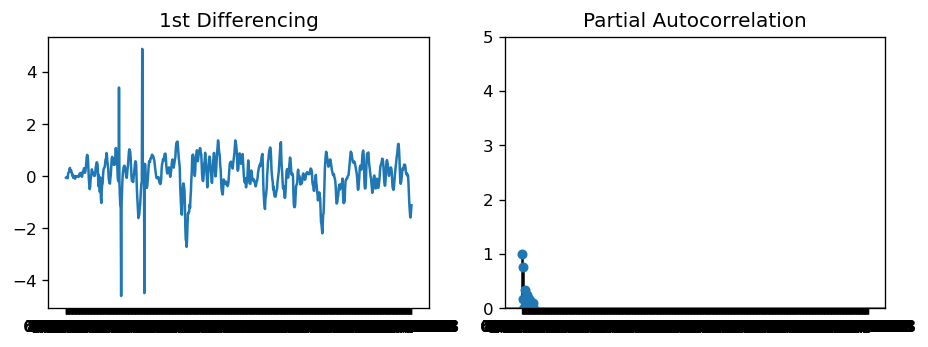

In [67]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

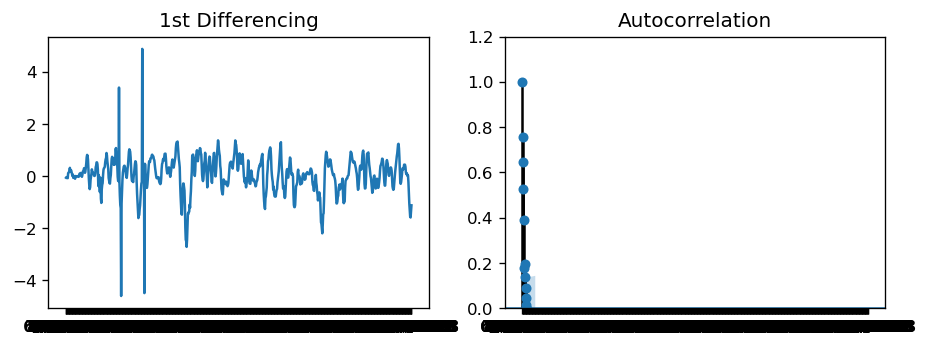

In [134]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
df = pd.read_csv('data.csv', names=['value'], header=0)

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

In [135]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,4 ARIMA Model
model = ARIMA(df.value, order=(7,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\sizzl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sizzl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  803
Model:                 ARIMA(7, 1, 2)   Log Likelihood                -330.670
Method:                       css-mle   S.D. of innovations              0.363
Date:                Wed, 08 Dec 2021   AIC                            683.339
Time:                        19:13:37   BIC                            734.911
Sample:                             1   HQIC                           703.147
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0553      0.061      0.907      0.364      -0.064       0.175
ar.L1.D.value     1.2065      0.036     33.960      0.000       1.137       1.276
ar.L2.D.value    -0.8680      0.053    -

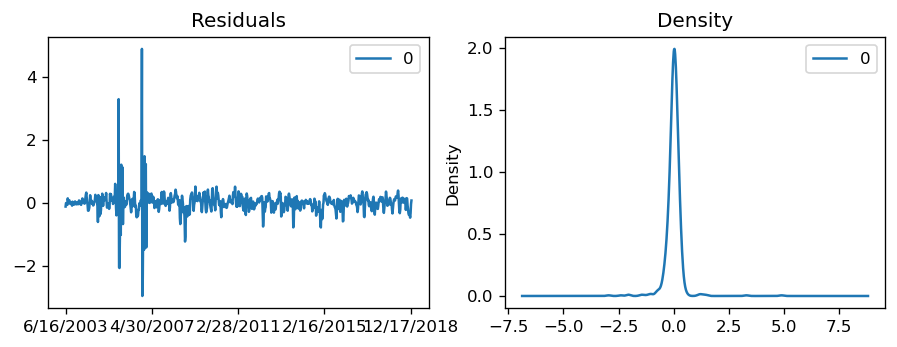

In [136]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

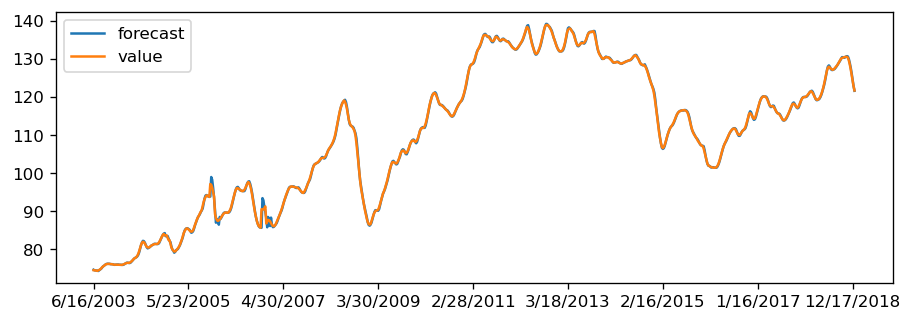

In [137]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

# 10. How to do find the optimal ARIMA model manually using Out-of-Time Cross validation
In Out-of-Time cross-validation, you take few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

To do out-of-time cross-validation, you need to create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio or a reasonable proportion based on time frequency of series.

Why am I not sampling the training data randomly you ask?

That’s because the order sequence of the time series should be intact in order to use it for forecasting.

In [138]:
df.shape

(804, 1)

In [139]:
train = df.value[:603]
test = df.value[603:]

C:\Users\sizzl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sizzl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  602
Model:                 ARIMA(7, 1, 2)   Log Likelihood                -314.914
Method:                       css-mle   S.D. of innovations              0.404
Date:                Wed, 08 Dec 2021   AIC                            651.828
Time:                        19:14:00   BIC                            700.231
Sample:                             1   HQIC                           670.668
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0562      0.074      0.755      0.450      -0.090       0.202
ar.L1.D.value     1.1538      0.040     28.682      0.000       1.075       1.233
ar.L2.D.value    -0.8321      0.059    -

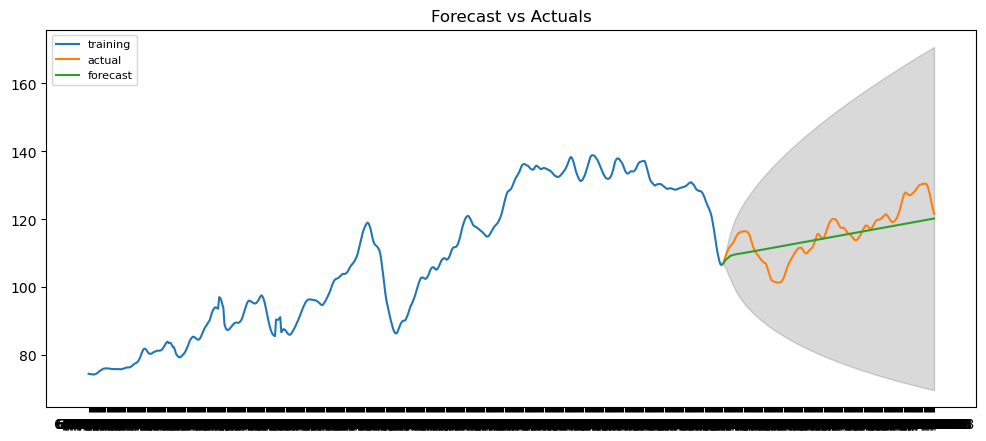

In [140]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(7, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(201, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# From the chart, the ARIMA(7,1,2) model seems to give a directionally correct forecast. And the actual observed values lie within the 95% confidence band. That seems fine.

But each of the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve. So, there is definitely scope for improvement.

So, what I am going to do is to increase the order of differencing to two, that is set d=2 and iteratively increase p to up to 5 and then q up to 5 to see which model gives least AIC and also look for a chart that gives closer actuals and forecasts.

While doing this, I keep an eye on the P values of the AR and MA terms in the model summary. They should be as close to zero, ideally, less than 0.05.

C:\Users\sizzl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sizzl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  602
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -544.076
Method:                       css-mle   S.D. of innovations              0.597
Date:                Wed, 08 Dec 2021   AIC                           1094.152
Time:                        16:50:14   BIC                           1107.352
Sample:                             1   HQIC                          1099.290
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0538      0.036      1.486      0.137      -0.017       0.125
ma.L1.D.value     0.4881      0.025     19.626      0.000       0.439       0.537
                                    Root

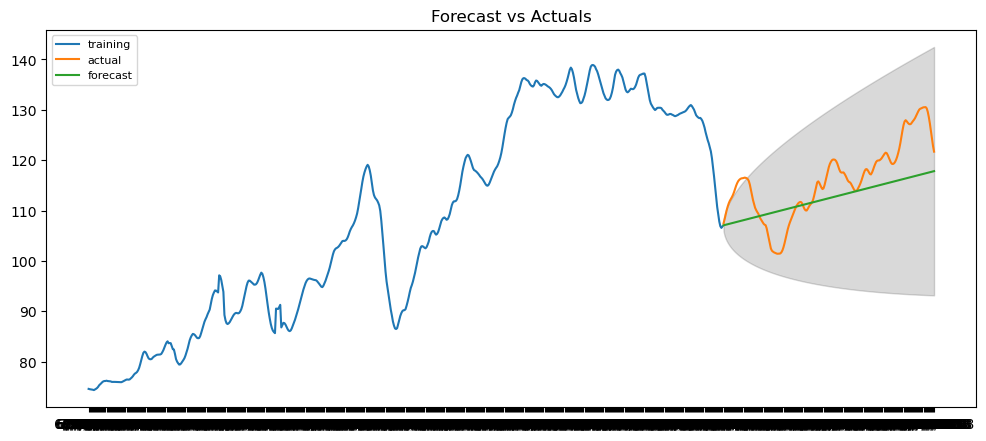

C:\Users\sizzl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sizzl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  602
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -430.243
Method:                       css-mle   S.D. of innovations              0.494
Date:                Wed, 08 Dec 2021   AIC                            868.487
Time:                        16:50:18   BIC                            886.088
Sample:                             1   HQIC                           875.337
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0532      0.092      0.575      0.565      -0.128       0.234
ar.L1.D.value     0.8361      0.028     29.922      0.000       0.781       0.891
ma.L1.D.value    -0.2418      0.045     

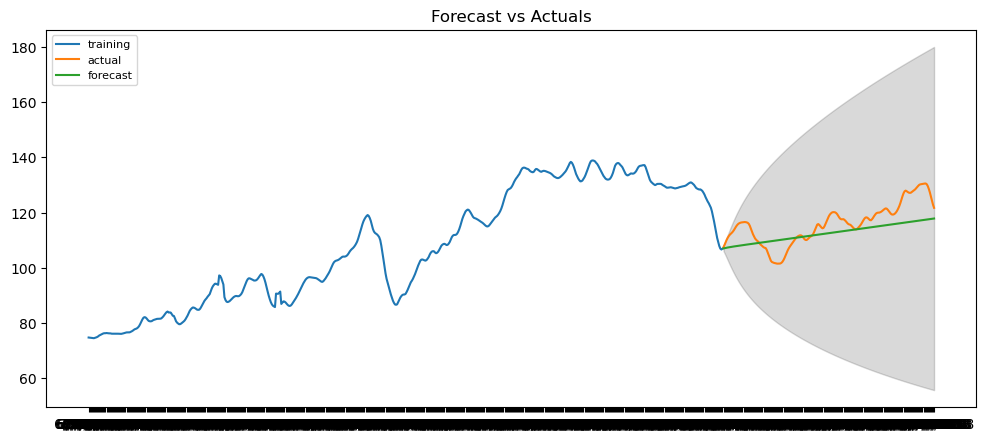

C:\Users\sizzl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sizzl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  602
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -428.921
Method:                       css-mle   S.D. of innovations              0.493
Date:                Wed, 08 Dec 2021   AIC                            867.841
Time:                        16:50:23   BIC                            889.842
Sample:                             1   HQIC                           876.405
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0536      0.092      0.584      0.559      -0.126       0.233
ar.L1.D.value     0.6273      0.132      4.763      0.000       0.369       0.885
ar.L2.D.value     0.1674      0.100     

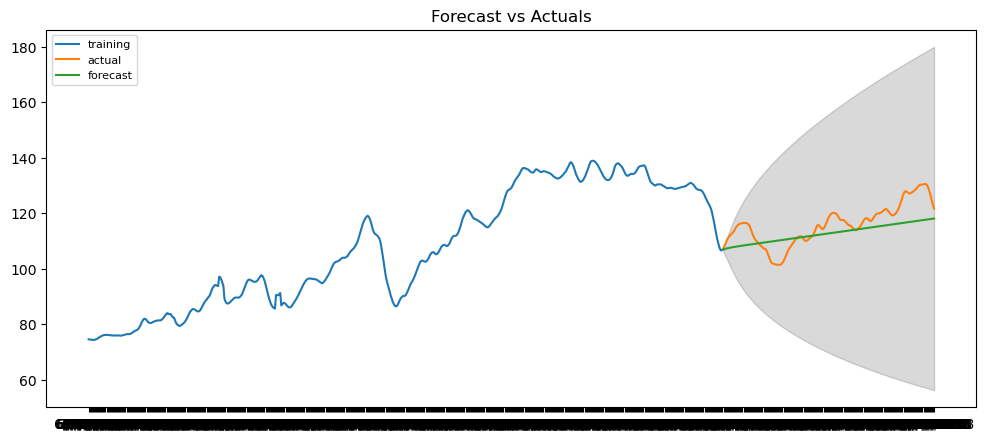

C:\Users\sizzl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sizzl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  602
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -428.760
Method:                       css-mle   S.D. of innovations              0.493
Date:                Wed, 08 Dec 2021   AIC                            869.520
Time:                        16:50:27   BIC                            895.922
Sample:                             1   HQIC                           879.796
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0534      0.093      0.576      0.565      -0.128       0.235
ar.L1.D.value     0.4606      0.262      1.758      0.079      -0.053       0.974
ar.L2.D.value     0.2510      0.155     

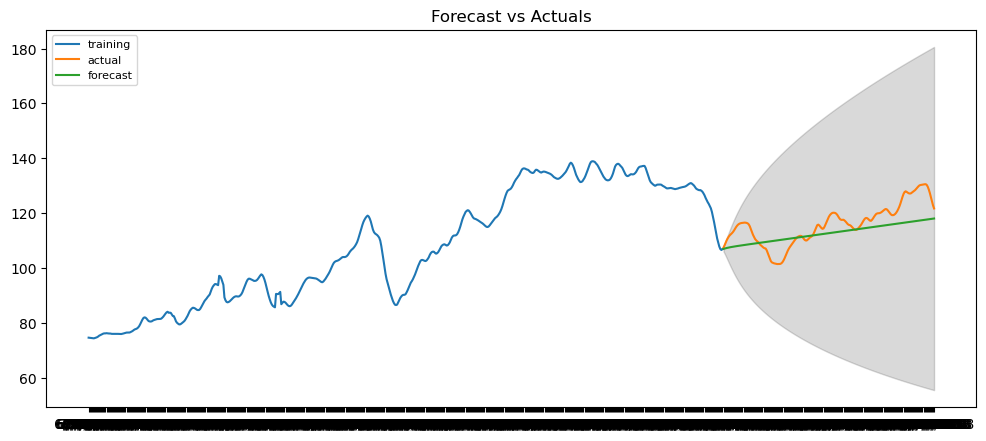

C:\Users\sizzl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sizzl\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  602
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -421.666
Method:                       css-mle   S.D. of innovations              0.487
Date:                Wed, 08 Dec 2021   AIC                            857.332
Time:                        16:50:32   BIC                            888.134
Sample:                             1   HQIC                           869.321
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0571      0.073      0.781      0.435      -0.086       0.201
ar.L1.D.value     0.9813      0.123      8.010      0.000       0.741       1.221
ar.L2.D.value    -0.0125      0.088     

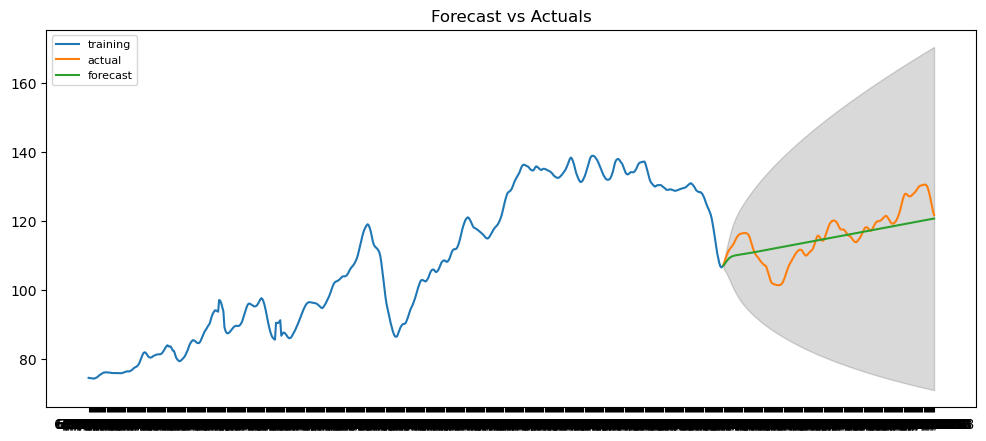

In [91]:
for p in range(5):
    # Build Model
    model = ARIMA(train, order=(p, 1, 1))  
    fitted = model.fit(disp=-1)  
    print(fitted.summary())

    # Forecast
    fc, se, conf = fitted.forecast(201, alpha=0.05)  # 95% conf

    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

# Accuracy Metrics

In [141]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**0.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = 0                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)


{'mape': 0.03629809234880309,
 'me': -1.240502690685909,
 'mae': 4.207230763317971,
 'mpe': -0.008120555489467648,
 'rmse': 5.296589518604728,
 'acf1': 0,
 'corr': 0.7890103276513317,
 'minmax': 0.035414425648039205}

# AUTO ARIMA
Like R’s popular auto.arima() function, the pmdarima package provides auto_arima() with similar functionality.

auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [95]:
!pip install pmdarima

  Using cached pmdarima-1.8.4-cp38-cp38-win_amd64.whl (600 kB)


In [142]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('data.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=982.481, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1685.959, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1002.399, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1324.003, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1689.749, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=980.781, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=978.878, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=980.679, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=966.121, Time=0.60 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=962.326, Time=0.44 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=973.635, Time=0.20 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=841.662, Time=0.38 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=892.584, Time=0.25 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=801.464, Time=0.56 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=8

In [145]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
X = df.values
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, 12)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

TypeError: only size-1 arrays can be converted to Python scalars